# Lab06: Clustering.

- MSSV: 18600100
- Họ và tên: Phan Phi Hùng

 
## Yêu cầu bài tập

**Cách làm bài**


Bạn sẽ làm trực tiếp trên file notebook này; từ `TODO` cho biết những phần mà bạn cần phải làm.

Bạn có thể thảo luận ý tưởng cũng như tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn*. 

Nếu vi phạm thì sẽ bị 0 điểm cho bài tập này.

**Cách nộp bài**

Trước khi nộp bài, rerun lại notebook (`Kernel` -> `Restart & Run All`).

Nộp file *\<MSSV\>.ipynb*

**Nội dung bài tập**

Sử dụng các thuật toán gom cụm để gom cụm các đường dẫn trong dữ liệu thu thập được.

### Ví dụ cách phân cụm với dữ liệu đơn giản

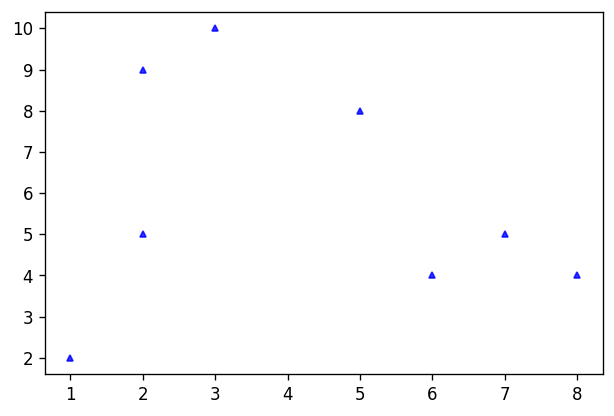

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=[[3,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[2,9]]
X=np.array(X)
plt.figure(dpi=120)
plt.plot(X[:, 0], X[:, 1], 'b^', markersize = 4, alpha = .8)

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import sklearn
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

In [ ]:
clustering1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single').fit(X)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete').fit(X)

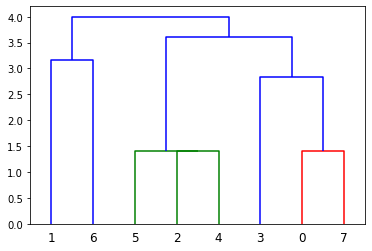

In [ ]:
plot_dendrogram(clustering1, truncate_mode='level', p=3)
plt.gcf()
plt.savefig("singleLink.png", dpi=200)

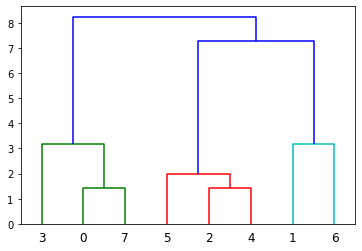

In [ ]:
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.gcf()
plt.savefig("completeLink.png",dpi=200)

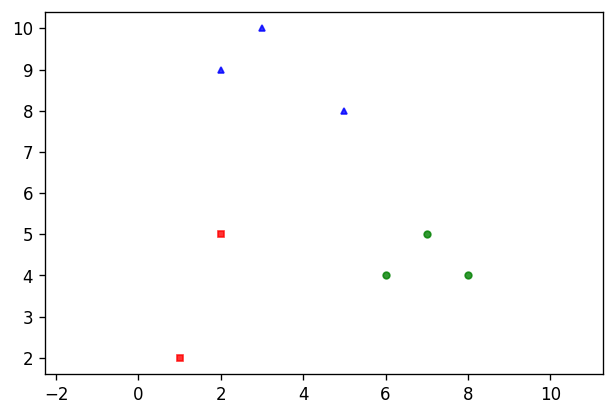

In [ ]:
model1=KMeans(n_clusters=3)
model1.fit(X)
pred=model1.predict(X)
visualize(X,pred)

### Phân cụm các đường dẫn dựa vào ma trận M ở lab trước:

Đọc ma trận M đã tính được ở lab trước (TF-IDF):

In [ ]:
# TODO
M = np.loadtxt('tfidf.csv', delimiter=',')
print(M.shape)

(200, 201282)


Coi mỗi dòng trong ma trận M là vector đặc trưng của đường dẫn tương ứng với dòng đó, hãy phân cụm các đường dẫn dựa vào sự tương đồng của các vector đặc trưng.

In [ ]:
# TODO
clustering1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single').fit(M)
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='complete').fit(M)

Visualize các cụm đã phân được.

**Lưu ý**: do các vector đặc trưng của đường dẫn có nhiều hơn 2 chiều nên không cần visualize trên mặt phẳng Oxy. Nói cách khác, chỉ cần visualize dendrogram single và complete linkage.

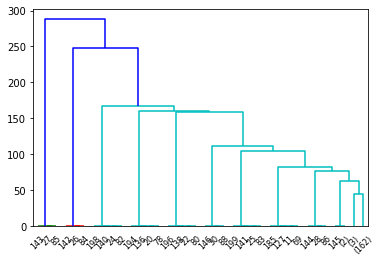

In [ ]:
# TODO
plot_dendrogram(clustering1, truncate_mode='level', p=10)
plt.gcf()
plt.savefig("singleLink.png", dpi=200)

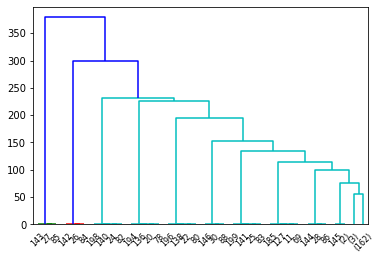

In [ ]:
plot_dendrogram(clustering, truncate_mode='level', p=10)
plt.gcf()
plt.savefig("completeLink.png",dpi=200)